**Note**: you can change the images that are randomly searched on https://source.unsplash.com/ by changing the `image_path` argument of the `get_img` method, either for the `intro` or `classification_task` section.

Press the space bar when you can clearly name what you see.
Fixing image resolution
You are going to see pictures of cats and dogs.
Say 'ok' when you became aware of this context
ok
Type "c" for cat or "d" for dog
Press enter to increase resolution
correct!
correct!
correct!
Score: 1.0
Resolution without context provided: 58
Resolutions on classification task:
[40, 27, 48]


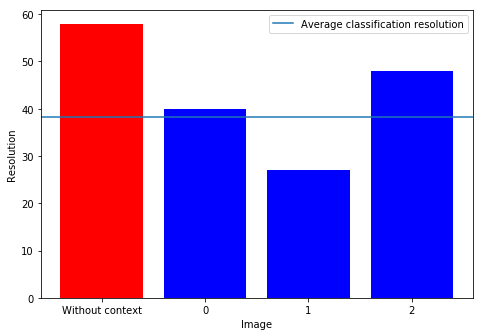

Image complexity without context provided: 10092 bytes
Average complexity with context provided: 4633.0 bytes


In [2]:
import math
import random
import cv2
import os
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt

def pixelize(image, resolution):
    # Get input size
    width, height, _ = image.shape

    # Resize input to "pixelated" size
    temp = cv2.resize(image, (resolution, resolution),
                      interpolation=cv2.INTER_LINEAR)
    # Initialize output image
    output = cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)
    
    return output

def resolution_to_size(resolution):
    """
    Return the size in bytes of a square image with some resolution
    """
    return resolution * resolution * 3

def increase_resolution(resolution):
    return math.ceil(resolution * 1.2)

def get_img(image_path='animal', random_img=False):
    """ Return image either from file path or from url.

    Parameters:
        image_path (str): Path to the image to identify.
        random_img (bool): If true, identify a random image from picsum.com

    Returns:
        img (int): The image.
    """
    
    img = None
    if random_img:
        # Getting random image from picsum, with 500 square resolution
        req = urlopen('https://source.unsplash.com/500x500/?' + image_path)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        img = cv2.imdecode(arr, -1)
    else:
        # Otherwise reading image from path
        img = cv2.imread(image_path)    
    
    return img

def establish_resolution(img):
    """ Establish a square minimal resolution to identify an image.

    Parameters:
        img: The image to identify.

    Returns:
        resolution (int): The minimal square resolution to identify the image by the user.   
    """
        
    width, height, _ = img.shape
    resolution = 1
    fixed_resolution = False
    while not fixed_resolution:
        output = pixelize(img, resolution)
        cv2.imshow('Image', output)

        key = cv2.waitKey(0)
        if not fixed_resolution and key == 32:
            print('Fixing image resolution')
            fixed_resolution = True
            return resolution

        resolution = increase_resolution(resolution)
        if resolution > width:
            resolution = 1
            
    return resolution
    
def intro():
    print("Press the space bar when you can clearly name what you see.")
    
    intro_img = get_img(image_path='cat', random_img=True)
    resolution = establish_resolution(intro_img)
    
    cv2.destroyAllWindows()
    
    return resolution

def wait_for_answer(img, guess_resolution):
    
    output = pixelize(img, guess_resolution)
    cv2.imshow('Cat or Dog ?', output)
    
    # Waiting for guess or to increase resolution
    key = cv2.waitKey(0)
    while key != ord('c') and key != ord('d'):
        # Increase resolution if press enter
        if key == 13:
            guess_resolution = increase_resolution(guess_resolution)
            if guess_resolution > img.shape[0]:
                guess_resolution = 1
            output = pixelize(img, guess_resolution)
            cv2.imshow('Cat or Dog ?', output)
        # Invalid output
        else:
            indication_str = 'Invalid input: type \"c\" for cat or \"d\" for dog'
            print(indication_str)
        key = cv2.waitKey(0)
        
    answer = 0 if key == ord('c') else 1
    return answer, guess_resolution

def classification_guess(img, true_label):

    result = 1
    answer = None
    guess_resolution = 1
    while answer is None or answer != true_label:
        answer, guess_resolution = wait_for_answer(img, guess_resolution)
        if answer != true_label:
            print('Wrong!')
            result = 0
            
    print('correct!')
    
    return result, guess_resolution
    
    
def classification_task(nb_images=3):
    print("You are going to see pictures of cats and dogs.")
    print("Say 'ok' when you became aware of this context")
    input()

    indication_str = 'Type \"c\" for cat or \"d\" for dog'
    print(indication_str)
    print('Press enter to increase resolution')

    correct = 0    
    guess_resolutions = []
    for i in range(nb_images):
        
        label = random.randint(0, 1)
        animal_name = 'cat' if label == 0 else 'dog'
        img = get_img(image_path=animal_name, random_img=True)

        result, guess_resolution = classification_guess(img, label)
        correct += result
        guess_resolutions.append(guess_resolution)
        
    cv2.destroyAllWindows()
    
    score = correct / nb_images
    
    return guess_resolutions, score

def plot_results(resolution_without_context, classification_resolutions):
    nb_classifications = len(classification_resolutions)
    labels = ['Without context'] + ['{}'.format(i) for i in range(nb_classifications)]
    colors = ['red'] + ['blue' for i in range(nb_classifications)]
    data = [resolution_without_context] + classification_resolutions
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(labels, data, color=colors)
    plt.axhline(np.mean(classification_resolutions), label='Average classification resolution')
    plt.xlabel('Image')
    plt.ylabel('Resolution')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    
    intro_resolution = intro()
    classification_resolutions, score = classification_task(3)
    
    print("Score: {}".format(score))
    
    print("Resolution without context provided: {}".format(intro_resolution))
    print("Resolutions on classification task:")
    print(classification_resolutions)
    
    plot_results(intro_resolution, classification_resolutions)
    
    print("Image complexity without context provided: {} bytes".format(resolution_to_size(intro_resolution)))
    image_sizes = []
    for resolution in classification_resolutions:
        image_sizes.append(resolution_to_size(resolution))
    print("Average complexity with context provided: {} bytes".format(np.mean(image_sizes)))

<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />
<br />